This file 
1. counts the number of surveys started
2. counts the number of surveys completed
3. describes the duration the surveys took
4. removes ineligible participants
5. counts the number of eligible participant
6. removes  unneeded columns such as identifiers
7. saves the clean csv file for analysis

In [1]:
# %%LOAD LIBRARIES

import pandas as pd
import regex as re

import matplotlib.pyplot as plt

import statistics as st

#from IPython.display import display, HTML

########### DATA BEFORE DRILL DOWN CHANGE


###################################

#LOAD FILES
fileName = "Data/OriginalData.csv"

df_first = pd.read_csv(fileName) #read new file


#remove first two rows as they are headings

df_first = df_first.iloc[2:]




##### NEWEST DATA
#file name for wrangling

fileName_input = str(20220105)


###################################

#LOAD FILES

##fileName = "UploadedFiles/FileName_extracted/" + fileName_input + "/"+ fileName_input +".csv"

fileName = "Data/"+ fileName_input + ".csv"


df = pd.read_csv(fileName) #read new file


#remove first two rows as they are headings

df = df.iloc[2:]




#replace data with original from before drill down change

df.update(df_first)


##########NUMBER OF SURVEYS FOR STARTED
print("***********************************")
print ("NUMBER OF SURVEYS STARTED")
started = len(df)

print(started)




# %% WRANGLING 


###### replace weird values with correct ones

#replace the response which made us realise we missed the college subspecialty with correct data
df.loc[df.ResponseId == "R_Renrr6DKWyWaiYh", "Q3_1"] = "RACS"

df.loc[df.ResponseId == "R_Renrr6DKWyWaiYh", "Q3_2"] = "Orthopaedic"




#replace college "62" with "RACS"
df.loc[df.Q3_1== "62", "Q3_1"] = "RACS"


#replace subspecialty "64" with "General Surgery" 
df.loc[df.Q3_2== "64", "Q3_2"] = "General Surgery"

#repace the 75 and 76 with RANZCP ~ - values as per original drill down.
df.loc[(df.Q3_2== "76" ), "Q3_2"] = "-"


df.loc[df.Q3_1== "75", "Q3_1"] = "RANZCP"


#replace college random RACMA colleges that have RACP subspecialty with RACP
df.loc[(df.Q3_2== "Addiction Medicine")|
       (df.Q3_2== "Cardiology (Adult)")|
       (df.Q3_2== "Cardiology (Paediatric)")|
       (df.Q3_2== "CCH")|
       (df.Q3_2== "Clinical Diploma in Palliative Medicine.")|
       (df.Q3_2== "Clinical Genetics")|
       (df.Q3_2== "Clinical Pharmacology")|
       (df.Q3_2== "Endocrinology")|
       (df.Q3_2== "Gastroenterology")|
       (df.Q3_2== "Gen Paeds")|
       (df.Q3_2== "General & Acute Care Medicine.")|
       (df.Q3_2== "General Rehabilitation Medicine")|
       (df.Q3_2== "Geriatric Medicine")|
       (df.Q3_2== "Infectious Diseases")|
       (df.Q3_2== "Nephrology")|
       (df.Q3_2== "NPM")|
       (df.Q3_2== "OEM")|
       (df.Q3_2== "Oncology")|
       (df.Q3_2== "Palliative")|
       (df.Q3_2== "PHM")|
       (df.Q3_2== "Respiratory Medicine & Sleep Medicine")|
       (df.Q3_2== "Sexual Health Medicine")|
       (df.Q3_2== "Clinical Haematology")|
       (df.Q3_2== "Clinical Immunology & Allergy")|
       (df.Q3_2== "Neurology")|
       (df.Q3_2== "Paediatric Rehabilitation Medicine")|
       (df.Q3_2== "PEM")|
       (df.Q3_2== "AYAM"), 
       "Q3_1"] = "RACP"



#replace "college and subspecialty" with "prefer not to say" - only 2 participants but they did not answer the survey anyway.

df.loc[df.Q3_1 == "College", "Q3_1"] = "Prefer not to say"

df.loc[df.Q3_2== "Subspecialty", "Q3_2"] = "Prefer not to say"



#make all upper case as original extraction had upper and later versions had lower

df['Finished'] = df['Finished'].str.upper() 



***********************************
NUMBER OF SURVEYS STARTED
468


***********************************
NUMBER OF ELIGIBLE PARTICIPANTS
426
***********************************
ELIGIBLE PARTICIPANTS - HAS THE SURVEY BEEN FINISHED?
TRUE     241
FALSE    185
Name: Finished, dtype: int64
***********************************
MAX NUMBER OF PROJECTS UPLOADED:
4


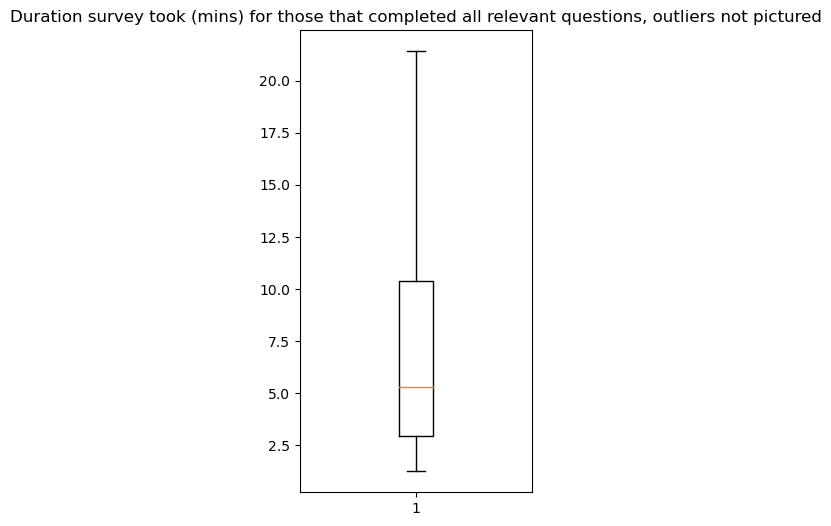

*******************
MEDIAN DURATION IN MINS
5.316666666666666
*******************
MAX DURATION IN MINS
27355.216666666667
*******************
MIN DURATION IN MINS
1.25


In [2]:
# %%% NUMBERS CHECK

########## ELIGIBILITY CHECK

#only include participants that are eligible to participate

df = df[(df.Q0a == "Yes") & (df.Q0b == "Yes") ]

#create identifier
df["Identifier"] = df['Q0.1a']+ df['Q0.1b']+ df['Q0.1c']+ df[ 'Q0.1d']+ df[ 'Q0.1e']


########## NUMBER OF ELIGIBLE PARTICIPANTS
print("***********************************")
print ("NUMBER OF ELIGIBLE PARTICIPANTS")
eligible = len(df)

print(eligible)


print ("***********************************")
print("ELIGIBLE PARTICIPANTS - HAS THE SURVEY BEEN FINISHED?")
print(df.Finished.value_counts())



# %% REMOVE IDENTIFIERS and UNNEEDED COLUMNS


#remove columns where all are Nulls

df = df.dropna(axis=1, how='all')


#Find max number of projects uploaded

#get list of headings
headings = list(df)


#find the max number of projects submitted
r = re.compile("^\d+\_Q9a_Id")
newlist = list(filter(r.match, headings)) # Read Note below

numbers = []

for i in newlist:
    i = int(i.split('_', 1)[0].replace('.', '').upper())
    numbers.append(i)


print("***********************************")
print ("MAX NUMBER OF PROJECTS UPLOADED:")
print (max(numbers))


## remove uploaded project names

for i in range(max(numbers)):
    n = str(i + 1)
    ID = n + "_Q9a_Id"
    df.loc[df[ID].notnull(), ID] = 1
   


# SUREY DURATION COMPLETED SURVEYS


#### plot duration it took to do survey

completed_df = df[df['Finished']=="TRUE"]

plt_1 = plt.figure(figsize=(3, 6))

#data
d = completed_df["Duration (in seconds)"]

d = pd.to_numeric(d)/60




#title
plt.title('Duration survey took (mins) for those that completed all relevant questions, outliers not pictured')


plt.boxplot(d, showfliers=False)
plt.show()

print("*******************")
print("MEDIAN DURATION IN MINS")
print(st.median(d))

print("*******************")
print("MAX DURATION IN MINS")
print(max(d))

print("*******************")
print("MIN DURATION IN MINS")
print(min(d))




In [3]:
## columns for removing

col_remove = [
    #'Unnamed: 0', 
              'StartDate', 
              'EndDate', 
              'Status', 
             # 'Progress', 
              'Duration (in seconds)', 
              'Finished', 
              'RecordedDate', 
              'ResponseId', 
              'DistributionChannel', 
              'UserLanguage', 
              'Q_RecaptchaScore', 
             # 'Q_RecaptchaAssessmentName', 
              'Q0a', 
              'Q0b', 
              'Q0.1a', 
              'Q0.1b', 
              'Q0.1c', 
              'Q0.1d', 
              #'Q0.1e',
              'Q3.1', #only one entry that has used this and it has been captured above - Orthopaedics
              'Q17_1', 
              'Q17_2',
              ]



#create column names for columns with projects to remove identifing columns


for i in range(max(numbers)):
    n = str(i + 1)
    
    NAME = n + "_Q9a_Name"
    SIZE = n + "_Q9a_Size"
    TYPE = n + "_Q9a_Type"
    
   
    col_remove.append(NAME)
    col_remove.append(SIZE)
    col_remove.append(TYPE)





In [4]:
df = df.drop(columns= col_remove)


# %% REMOVE ROWS WITH NO RESPONSES

#get list of headings that will be dropped if all columns are nan
headings = list(df)

headings = headings[4:]

headings.remove('Identifier')
#headings

#drop row if all columns are nan
df = df.dropna(subset=headings, how = "all")

In [5]:
#check for duplicates

df["Identifier"].value_counts()

#these were manually examined. Jaaj199Male and JeJo142Female are genuine duplicates that need removing

duplicate = df[(df["Identifier"] == "Jaaj199Male") |( df["Identifier"] == "JeJo142Female")]["Identifier"].duplicated(keep = "first").reset_index()




#get index value of duplicates to REMOVE
#indecies1 = list(duplicate[duplicate["Identifier"]==True]["index"])
#display(HTML(df[df.index.isin(indecies1)][[ "Q13"]].to_html()))




In [6]:
#get index value of duplicates to REMOVE
indecies = list(duplicate[duplicate["Identifier"]==False]["index"])


#df.drop(indecies,axis=1)


df = df[~df.index.isin(indecies)]

In [7]:
########## NUMBER OF SURVEYS FOR ANALYSIS
print("***********************************")
print("NUMBER OF SURVEYS ANALYSED")

analysis = len(df)

print(analysis)

print("***********************************")
print("NUMBER ELIGIBLE/ SURVEYS STARTED")
print (round(eligible/started*100, 1))

print("***********************************")
print("NUMBER OF SURVEYS ANALYSED / NUMBER ELIGIBLE")
print (round(analysis/eligible*100, 1))


print("***********************************")
print("NUMBER OF SURVEYS ANALYSED / NUMBER STARTED")
print (round(analysis/started*100, 1))




# %% SAVE CLEAN AND DEIDENTIFIED DF
df.to_csv("Data/Wrangled.csv", index=False)

***********************************
NUMBER OF SURVEYS ANALYSED
371
***********************************
NUMBER ELIGIBLE/ SURVEYS STARTED
91.0
***********************************
NUMBER OF SURVEYS ANALYSED / NUMBER ELIGIBLE
87.1
***********************************
NUMBER OF SURVEYS ANALYSED / NUMBER STARTED
79.3


In [8]:
# %% GET DEPENDENCIES
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

print(requirements)

[('regex', '2022.7.9'), ('matplotlib', '3.7.0'), ('pandas', '1.5.3')]
